In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
data = pd.read_csv("input/data.csv")
del data["Unnamed: 32"]

In [34]:
x = data.iloc[:,2:].values
y = data.iloc[:,1].values

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [40]:
model = Sequential()

In [41]:
model.add(Dense(output_dim = 16,init="uniform",activation="relu",input_dim=30))
model.add(Dropout(p=0.1))

model.add(Dense(output_dim =16, init="uniform",activation="relu"))
model.add(Dropout(p=0.1))

model.add(Dense(output_dim=1, init="uniform",activation="sigmoid"))

C:\Users\Debanik Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
C:\Users\Debanik Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  
C:\Users\Debanik Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Debanik Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  """
C:\Users\Debanik Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_init

In [42]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [43]:
model.fit(X_train,y_train,batch_size=100,nb_epoch=150)

C:\Users\Debanik Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
512/512 [==============================] - 1s 3ms/step - loss: 0.6925 - acc: 0.6836
Epoch 2/150
512/512 [==============================] - 0s 64us/step - loss: 0.6904 - acc: 0.7324
Epoch 3/150
512/512 [==============================] - 0s 41us/step - loss: 0.6865 - acc: 0.8047
Epoch 4/150
512/512 [==============================] - 0s 36us/step - loss: 0.6805 - acc: 0.8770
Epoch 5/150
512/512 [==============================] - 0s 42us/step - loss: 0.6714 - acc: 0.9238
Epoch 6/150
512/512 [==============================] - 0s 42us/step - loss: 0.6564 - acc: 0.9277
Epoch 7/150
512/512 [==============================] - 0s 42us/step - loss: 0.6349 - acc: 0.9316
Epoch 8/150
512/512 [==============================] - 0s 56us/step - loss: 0.6081 - acc: 0.9375
Epoch 9/150
512/512 [==============================] - 0s 36us/step - loss: 0.5685 - acc: 0.9395
Epoch 10/150
512/512 [==============================] - 0s 47us/step - loss: 0.5251 - acc: 0.9414
Epoch 11/150
512/512 [========

512/512 [==============================] - 0s 30us/step - loss: 0.0531 - acc: 0.9883
Epoch 85/150
512/512 [==============================] - 0s 31us/step - loss: 0.0479 - acc: 0.9883
Epoch 86/150
512/512 [==============================] - 0s 46us/step - loss: 0.0479 - acc: 0.9883
Epoch 87/150
512/512 [==============================] - 0s 23us/step - loss: 0.0486 - acc: 0.9863
Epoch 88/150
512/512 [==============================] - 0s 29us/step - loss: 0.0487 - acc: 0.9902
Epoch 89/150
512/512 [==============================] - 0s 37us/step - loss: 0.0454 - acc: 0.9902
Epoch 90/150
512/512 [==============================] - ETA: 0s - loss: 0.0859 - acc: 0.980 - 0s 37us/step - loss: 0.0553 - acc: 0.9883
Epoch 91/150
512/512 [==============================] - 0s 48us/step - loss: 0.0524 - acc: 0.9863
Epoch 92/150
512/512 [==============================] - 0s 47us/step - loss: 0.0468 - acc: 0.9883
Epoch 93/150
512/512 [==============================] - 0s 37us/step - loss: 0.0468 - acc: 0.

In [44]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [46]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 94.73684210526315%


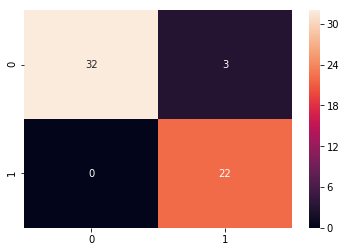

In [47]:
sns.heatmap(cm,annot=True)
plt.savefig("h.png")